Understanding with data set -> MNIST

 -> 28 * 28 = 784 inputs 

 -> 10 outputs
 

*1) Design model (input size, output size, forward pass)*

*2) Construct loss and optimizer*

*3) Training loop*

*- forward pass: compute prediction*

*- backward pass: gradients*

*- update weights*

*Done!!!*

# Past one: DATA

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# MNIST IMAGE --> Tensors 

In [22]:
transform = transforms.ToTensor()

In [23]:
train_data = datasets.MNIST(root="./Data", train=True, download=True, transform=transform)

In [24]:
test_data = datasets.MNIST(root="./Data", train=False, transform=transform)

In [25]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [26]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [27]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [28]:
print(type(train_data[0]))
type(train_data[0])

<class 'tuple'>


tuple

In [29]:
image, label = train_data[0]
print(image.shape, label) 
# gray scale image 

torch.Size([1, 28, 28]) 5


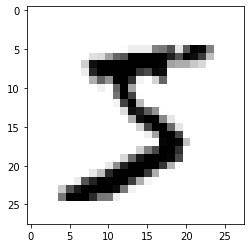

In [33]:
plt.imshow(image.reshape((28,28)),cmap="gist_yarg") #gray

In [34]:
# Create data loader 
torch.manual_seed(42)

# 0 images, 1images 
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=True)

In [35]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}')) # Formatting

In [37]:
# First batch
for images, labels in train_loader:
    # 60,000 / 100 => 60times
    break

In [38]:
print(images.shape) # 100 image 

torch.Size([100, 1, 28, 28])


In [39]:
labels.shape

torch.Size([100])

Labels:  [   9    9    4    7    7    9    4    7    9    1    7    5]


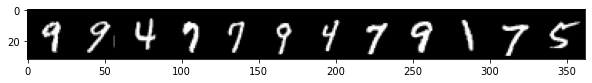

In [40]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# Part two: Model